# HW 1.2

# Image Compression using  PCA and Random Projection

PCA is a linear dimensionality reduction technique (algorithm) that transform a set of correlated variables (r) into a smaller p (p<r) number of uncorrelated variables called principal components while keeping as much of the variability in the original data as possible.

One of the use cases of PCA is that it can be used for **image compression** — a technique that minimizes the size in bytes of an image while keeping as much of the quality of the image as possible.

In this homework we will try to compress `shajarian_original.jpg` image!
![shajarian](https://i.ibb.co/1sPX0vM/shajarian-original.jpg)

# 1. Data compression using PCA

First! lets talk about low-rank matrix approximation!

## Low-Rank Matrix Approximations

### Motivation:
The primary goal of this lecture is to identify the “best” way to approximate a given matrix A
with a rank-k matrix, for a target rank k. Such a matrix is called a low-rank approximation.
Why might you want to do this?

1. **Compression. A low-rank approximation provides a (lossy) compressed version of the matrix**

2. De-noising. If A is a noisy version of some “ground truth” signal that is approximately low-rank, then passing to a low-rank approximation of the raw data A might throw out lots of noise and little signal, resulting in a matrix that is actually more informative than the original.

3. Matrix completion. Low-rank approximations offer a first-cut approach to the matrix completion problem

## PCA-Based Low-Rank Approximation

![matrix_compression](https://i.ibb.co/jhYKxzW/Screenshot-from-2023-11-12-04-46-02.png)

### Here is the step by step guide for data compressing using PCA:
![algorithm](https://i.ibb.co/yF3TS6D/Screenshot-from-2023-11-12-04-49-17.png)

### Theorem:
For every m × n matrix A, rank target k ≥ 1, and rank-k m × n matrix B, 
$$||A - A_k||_F \le || A - B ||_F$$
where $A_k$ is the rank-k approximation derived from the SVD of A.


In [1]:
import numpy as np
from PIL import Image, ImageDraw
from matplotlib import pyplot

### PCA Class
In this homework you should complete the functions of PCA class.

In [2]:
class PCA:
    def __init__(self, nd_matrix, compressed_dim):
        self.nd_matrix = nd_matrix
        self.compressed_dim = compressed_dim 
        self.U = self.S = self.V_T = None

    def compress(self, matrix): #
        U, S, V_T = np.linalg.svd(self.nd_matrix)  # You can use numpy to compute SVD

        # Compress the data based on `self.compressed_dim`
        self.U = U[:, :self.compressed_dim]
        self.S = S[:self.compressed_dim]
        self.V_T = V_T[:self.compressed_dim, :]

        return self.U, self.S, self.V_T

    def compressed_matrix(self):
        # Return the compressed matrix (image)
        return np.dot(np.dot(self.U, np.diag(self.S)), self.V_T)


### Loading Image

In [3]:
original_image = Image.open('shajarian_original.jpg')
image_array = np.array(original_image)
rgb_weights = [0.2989, 0.5870, 0.1140]
grayscale_image = np.dot(image_array, rgb_weights)

### Compressing the original image

Change `max_vec` to: 1, 10, 100, 200, 300, 500.

Explain what is happening:

k = 1


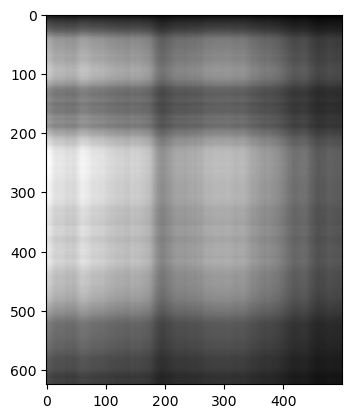

k = 10


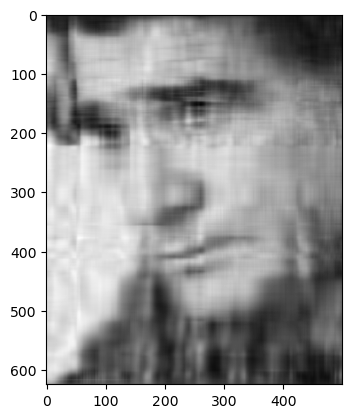

k = 100


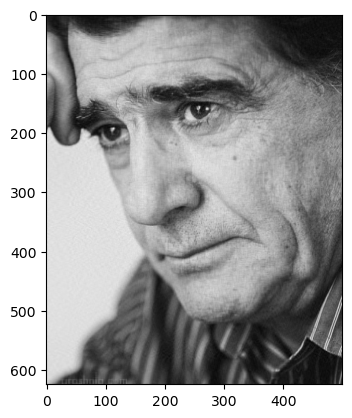

k = 200


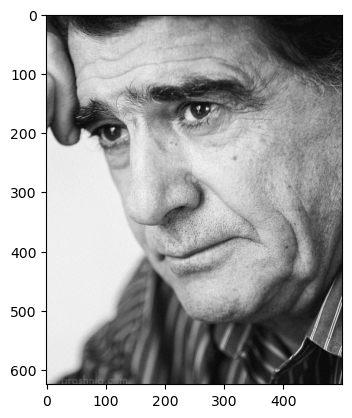

k = 300


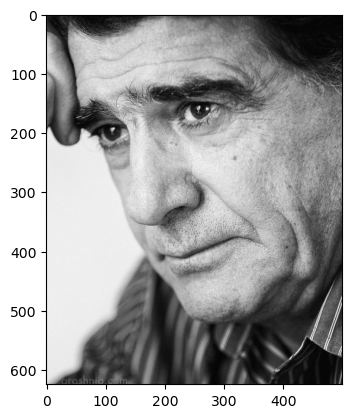

k = 500


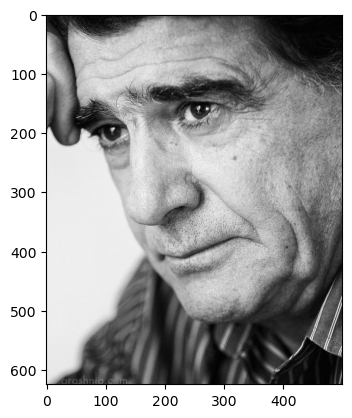

In [5]:
max_vec = [1, 10, 100, 200, 300, 500] #

for i in max_vec:
    arr = PCA(grayscale_image, i)
    arr.compress(grayscale_image)
    arr.compressed_matrix()
    pyplot.imshow(arr.compressed_matrix(), cmap=pyplot.get_cmap("gray"))
    print(f"k = {i}")
    pyplot.show()

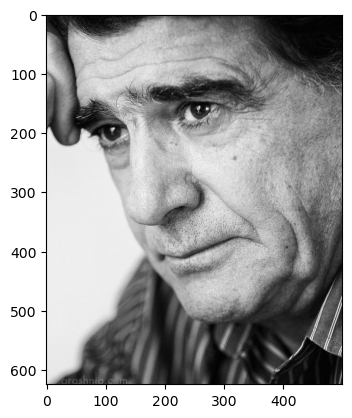

In [9]:
max_vec =  [1, 10, 100, 200, 300, 500]
for max_vec in max_vec:
    arr = PCA(grayscale_image, max_vec)
    arr.compress(grayscale_image)
    arr.compressed_matrix()
    t = pyplot.imshow(arr.compressed_matrix(), cmap=pyplot.get_cmap("gray"))
    pyplot.savefig(fname=f'shajarian_compressed_{max_vec}')

# 2. Compressing MNIST data using random projection

First we will write functions that will implement orthogonal projections.

## 1. Orthogonal Projections
Recall that for projection of a vector $\boldsymbol x$ onto a 1-dimensional subspace $U$ with basis vector $\boldsymbol b$ we have

$${\pi_U}(\boldsymbol x) = \frac{\boldsymbol b\boldsymbol b^T}{{\lVert\boldsymbol  b \rVert}^2}\boldsymbol x $$

And for the general projection onto an M-dimensional subspace $U$ with basis vectors $\boldsymbol b_1,\dotsc, \boldsymbol b_M$ we have

$${\pi_U}(\boldsymbol x) = \boldsymbol B(\boldsymbol B^T\boldsymbol B)^{-1}\boldsymbol B^T\boldsymbol x $$

where 

$$\boldsymbol B = [\boldsymbol b_1,...,\boldsymbol b_M]$$


Your task is to implement orthogonal projections. We can split this into two steps
1. Find the projection matrix $\boldsymbol P$ that projects any $\boldsymbol x$ onto $U$.
2. The projected vector $\pi_U(\boldsymbol x)$ of $\boldsymbol x$ can then be written as $\pi_U(\boldsymbol x) = \boldsymbol P\boldsymbol x$.

To perform step 1, you need to complete the function `projection_matrix_1d` and `projection_matrix_general`. To perform step 2, complete `project_1d` and `project_general`.


### Projection (1d)

In [11]:
def projection_matrix_1d(b): #
    """Compute the projection matrix onto the space spanned by `b`
    Args:
        b: ndarray of dimension (D,), the basis for the subspace
    
    Returns:
        P: the projection matrix
    """
    # YOUR CODE HERE
    b = b.reshape((-1, 1)) #projection matrix 1D
    
    P = np.dot(b, b.T) / np.dot(b.T, b)

    return P

With the help of the function `projection_matrix_1d`, you should be able 
to implement `project_1d`.

In [12]:
def project_1d(x, b):
    """Compute the projection matrix onto the space spanned by `b`
    Args:
        x: the vector to be projected
        b: ndarray of dimension (D,), the basis for the subspace
    
    Returns:
        y: ndarray of shape (D,) projection of x in space spanned by b
    """
    # YOUR CODE HERE
    proj_matrix = projection_matrix_1d(b)
    p = np.dot(proj_matrix, x)

    return p

### Projection (ND)

In [14]:
def projection_matrix_general(B):
    """Compute the projection matrix onto the space spanned by the columns of `B`
    Args:
        B: ndarray of dimension (D, M), the basis for the subspace
    
    Returns:
        P: the projection matrix
    """
    # YOUR CODE HERE
    P = np.dot(np.dot(B, np.linalg.inv(np.dot(B.T, B))), B.T)  #multi D
    
    return P

In [15]:
def project_general(x, B):
    """Compute the projection matrix onto the space spanned by the columns of `B`
    Args:
        x: ndarray of dimension (D, 1), the vector to be projected
        B: ndarray of dimension (D, M), the basis for the subspace
    
    Returns:
        p: projection of x onto the subspac spanned by the columns of B; size (D, 1)
    """
    # YOUR CODE HERE
    proj_matrix = projection_matrix_general(B)
    p = np.dot(proj_matrix, x)

    return p

# Project digits images
In this part we load some persian digits data to perform projection to.


In [16]:
load_limit = 100

def load_data(filename):
    fh = open(filename, 'r')
    file_length = len(fh.readlines())
    fh.seek(0, 0)
    data = np.zeros(shape=(min(load_limit, file_length), 1200))
    for i, line in enumerate(fh):
        if i == min(load_limit, file_length):
            break
        a_list = line.split(',')
        map_object = map(int, a_list)
        data[i] = list(map_object)
    fh.close()
    return data

`show_image` will convert (1200, 1) vector into the image

In [18]:
import matplotlib.pyplot as plt
def show_image(vector, save_path='no'):  # the input is a 1 * 1200 vector and should convert to a 40 * 30 image
    vector = vector.reshape(40, 30) * 255
    plt.imshow(vector, cmap='Greys_r', vmin=0, vmax=255)
    if save_path != 'no':
        plt.savefig(save_path)
    plt.show()

first 5 images:

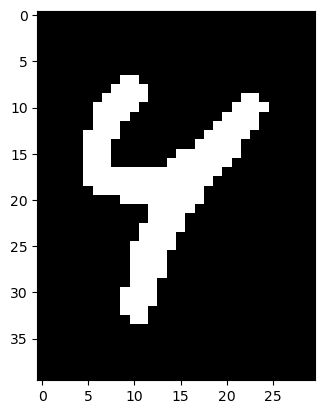

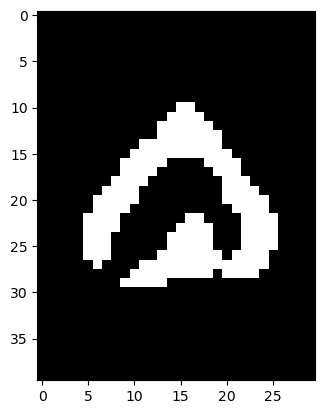

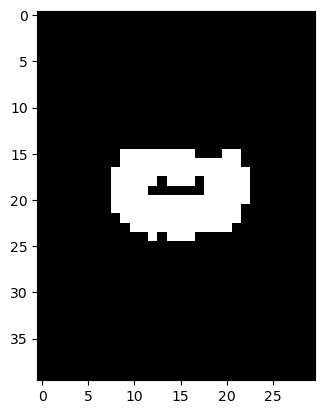

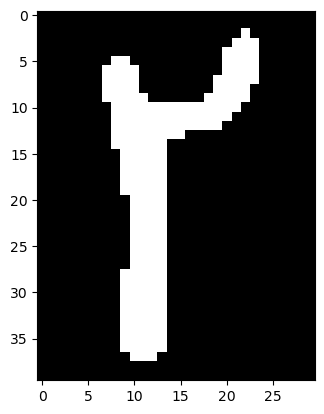

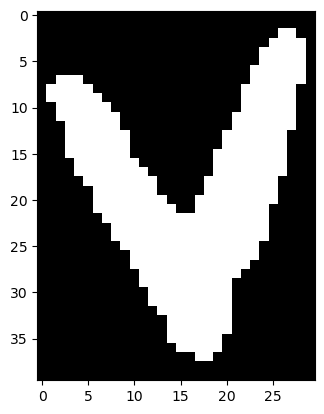

In [19]:
a = load_data("TrainData.txt")
for i in range(5):
    show_image(a[i])

## project to random B (Compressing using random projection)

in this part we want to project first 5 images into a random numpy array with shape=(1200, x)

find the minimum of x that images still can be verified

In [21]:
##### YOUR CODE HERE
from scipy.stats import ortho_group


compressed_images = list()


for real_image_number in a[:5]:
    x = 25
    random_image_with_different_x = list()
    while x < 1000:
        random_matrix_orthogonal = ortho_group.rvs(dim=1200)
        random_vector = random_matrix_orthogonal[:, :x]
        real_img_projection_to_random_vector = project_general(real_image_number, random_vector)
        random_image_with_different_x.append(real_img_projection_to_random_vector)
        x += 100
    compressed_images.append(random_image_with_different_x)

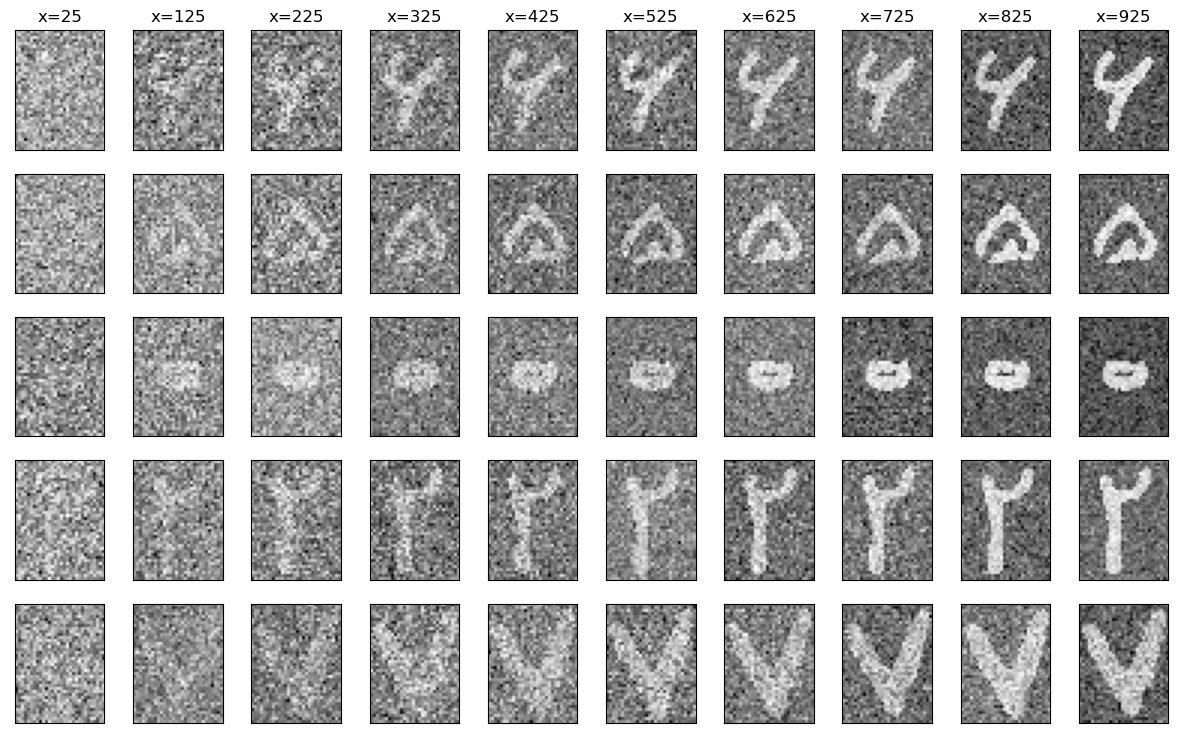

In [22]:
figure, axes = plt.subplots(5, 10, figsize=(15, 9))
x_list = [25, 125, 225, 325, 425, 525, 625, 725, 825, 925]


for i, compressed_img in enumerate(compressed_images):
    for j, x_image_compressed in enumerate(compressed_img):
        axes[i][j].imshow(x_image_compressed.reshape(40, 30), cmap='Greys_r')
        axes[i][j].set_xticks([])
        axes[i][j].set_yticks([])
        if i == 0:
            axes[i][j].set_title(f"x={x_list[j]}")

بنابراین، مقدار کمینه‌ای که بتوان با آن عکس را معتبر دانست برابرست 325.

# Answer this question:
### Is there any theoretical garentee for the random projection such as PCA for data compression? If so please write it and explain it!

پاسخ شما: برای قطعی بودن رندوم پروجکشن، میتوانیم از لم جانسون-لیندن‌استرائوس استفاده کرد. طبق این لم، می‌توانیم بطور قطعی گوییم که فاصله بین هر دو نقطه در فضای چند بعدی برابر با همان فاصله بین دو نقطه در فضای با ابعاد پایین‌تر است. بنابرین رندوم پروجکشن که یک روش برای کاهش ابعاد نیز است، همانند روش پی‌سی‌ای، دارای تضمین تئوری است و می‌توانیم آن را جز روش‌های کاهش ابعاد به حساب بیاوریم.

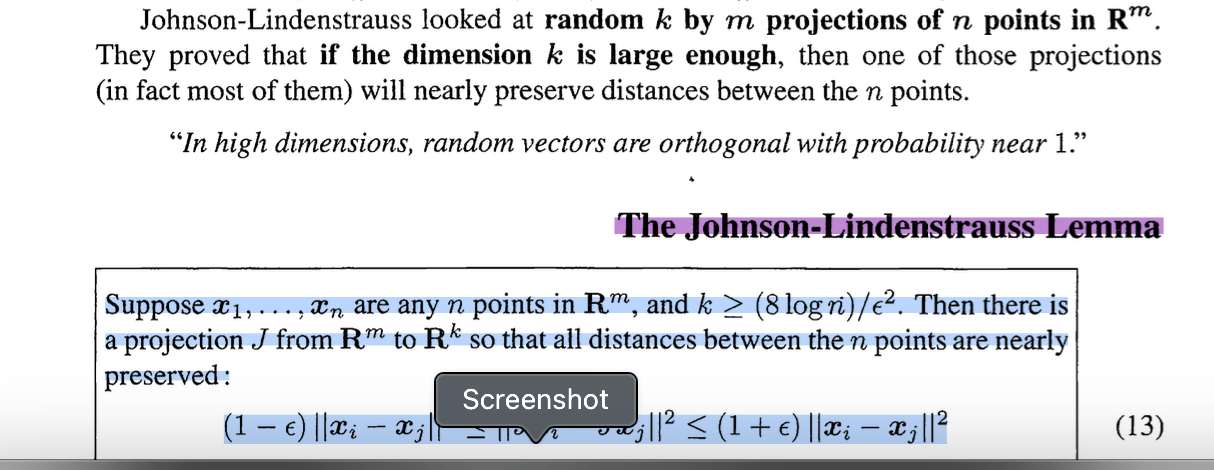